# Final project for Machine Learning Algorithm Course
# Gender Recognition by Voice and Speech Analysis

# Content
+ **Introduction**
+ **Data description**
+ **Data preprocessing**
+ **Creating a SVM model**
+ **Data analysis: visualisation**
+ **Conclusion**



# Introduction

+ This data about identifying a voice of male or female, based upon acoustic properties of the voice and speech. 
+ The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.
+ The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

+ Link to dataset https://www.kaggle.com/yashgupta24/gender-prediction-from-voice/data

# Data description
+ **meanfreq**: mean frequency (in kHz)
+ **sd**: standard deviation of frequency
+ **median**: median frequency (in kHz)
+ **Q25**: first quantile (in kHz)
+ **Q75**: third quantile (in kHz)
+ **IQR**: interquantile range (in kHz)
+ **skew**: skewness (see note in specprop description)
+ **kurt**: kurtosis (see note in specprop description)
+ **sp.ent**: spectral entropy
+ **sfm**: spectral flatness
+ **mode**: mode frequency
+ **centroid**: frequency centroid (see specprop)
+ **peakf**: peak frequency (frequency with highest energy)
+ **meanfun**: average of fundamental frequency measured across acoustic signal
+ **minfun**: minimum fundamental frequency measured across acoustic signal
+ **maxfun**: maximum fundamental frequency measured across acoustic signal
+ **meandom**: average of dominant frequency measured across acoustic signal
+ **mindom**: minimum of dominant frequency measured across acoustic signal
+ **maxdom**: maximum of dominant frequency measured across acoustic signal
+ **dfrange**: range of dominant frequency measured across acoustic signal
+ **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent + measurements of fundamental frequencies divided by the frequency range
+ **label**: male or female

##  Importing libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import  roc_curve, auc, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/voice.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Loading and reading dataset:

In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/voicegender/voice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# From here,we can see that: 
+ In general, 3168 rows  and 20 columns in the dataset.
+ Their datatype is float64, while label is object.
+ Also, there are no missing values.

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
print(df['label'].value_counts())
print(len(df))

male      1584
female    1584
Name: label, dtype: int64
3168


+ **We see that Males and Females number are the Same in Lable column**
### Let's assign, X and Y arrays of our dataset, 
+ **X is all columns except "Label"**
+ **Y is only column "Label"**

In [ ]:
X=df.drop('label',axis=1)
y=df['label']

# Data Preprocessing

In [ ]:
# Importing Preprocessing Libraries:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Encoding labels by LabelEncoder()

In [ ]:
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

### Scaling with Standard Scaler()

In [ ]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

## Train test split of dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.1, shuffle = True, random_state = 8,stratify=y)


#### We are splitting dataset to train and validation sets:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.1, random_state= 8)

# Creating Support Vector Machine (SVM) Classifier Model
+ For Classification Task:

In [ ]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

+ **Checking for accuracy scores for train,test and validation sets:**

In [ ]:
from sklearn.metrics import accuracy_score

y_svm_train=clf.predict(X_train)
print(round(accuracy_score(y_train,y_svm_train),3))

0.987


In [ ]:
y_svm=clf.predict(X_test)
print(round(accuracy_score(y_test,y_svm),3))

0.972


In [ ]:
y_sval=clf.predict(X_val)
print(round(accuracy_score(y_val,y_sval),3))

0.979


In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_val, y_sval)
print(conf)

[[158   4]
 [  2 122]]


In [ ]:
print("Classification Report for our model is ")
print(classification_report(y_test, y_svm))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       158
           1       0.96      0.98      0.97       159

    accuracy                           0.97       317
   macro avg       0.97      0.97      0.97       317
weighted avg       0.97      0.97      0.97       317



# Data analysis: Visualisation- EDA

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

### Visualization of Confusion Matrix

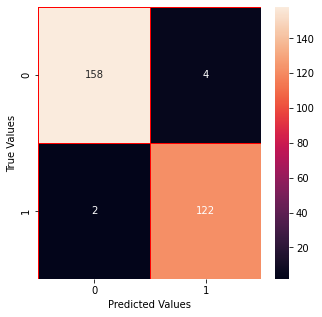

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Visualization of ROC curve metrics

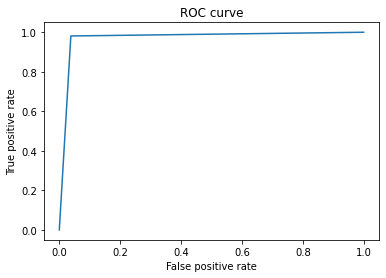

AUC of the predictions: 0.9715786959636972
Accuracy score of the predictions: 0.9716088328075709


In [ ]:
# ROC Curve

fpr, tpr, thresholds =roc_curve(y_test,y_svm, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(auc(fpr, tpr)))

# Measure the Accuracy Score
print("Accuracy score of the predictions: {0}".format(accuracy_score(y_svm, y_test)))

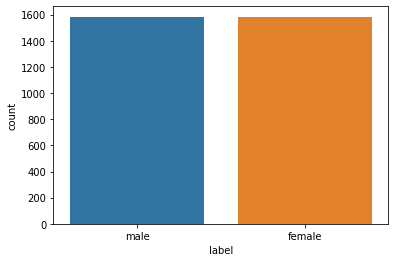

In [ ]:
sns.countplot(data=df,x='label');

**Luckily our data is balanced "equal number of classes"**

### Heatmap for correlation visualization

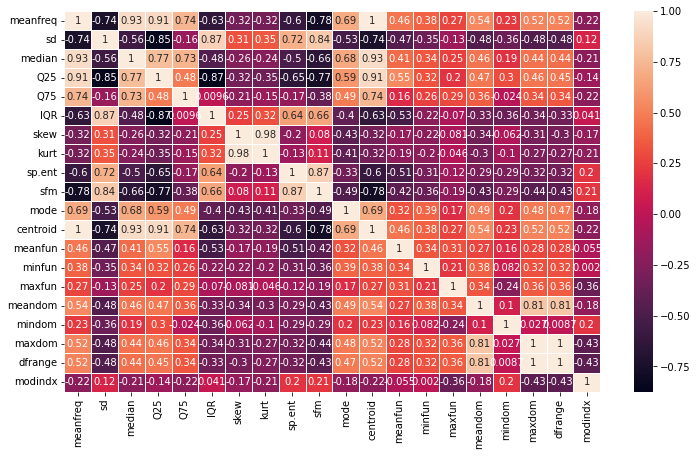

In [ ]:
#Lets construct a heatmap to see which variables are very correlated
no_label_data = df.drop(['label'], axis = 1)
cors = no_label_data.corr()

plt.figure(figsize=(12,7))
sns.heatmap(cors, linewidths=.5, annot=True)
plt.show()

**This Heatmap shows the correlations between the features; and by looking at it we find a positive correlation between the label and IQR, label and sp.ent, and a huge negative correlation between the label and meanfun.**

## Boxplot

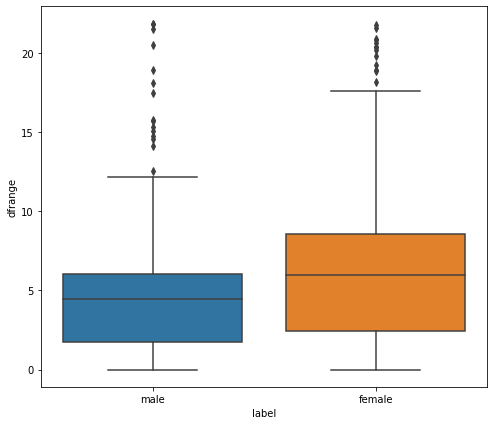

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x="label", y="dfrange", data=df)
plt.show()

**Many outliers there outside the top whisker for males. That means that there quite many male persons that sound female-like, since they have high frequency ranges.**

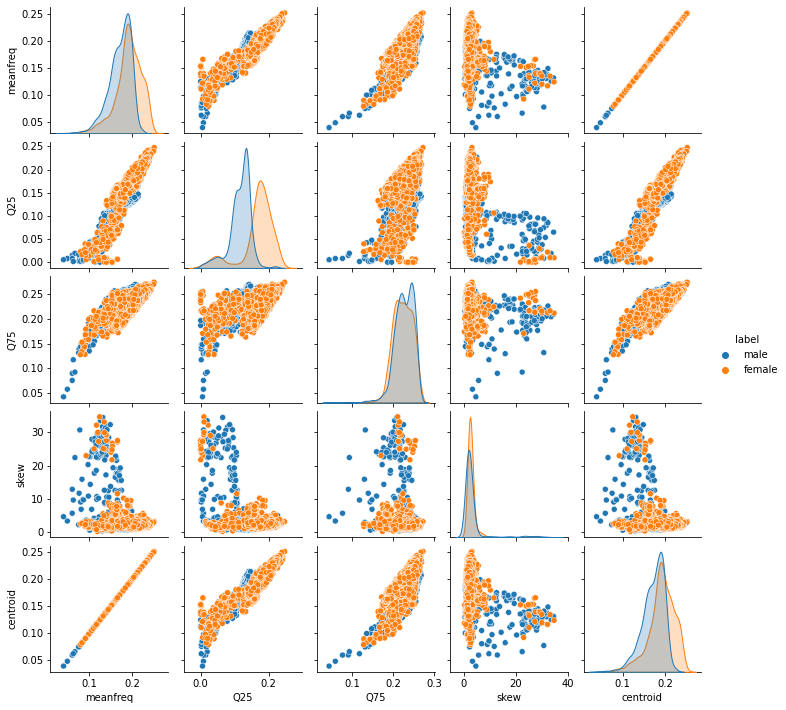

In [ ]:
import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')

sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)

**This pairplot is plotted to show the relations between the dataset features and we find that the skewness with the quartiles are having a weak relation unlike the meanfreq with the centroid as they have a strong relation.**

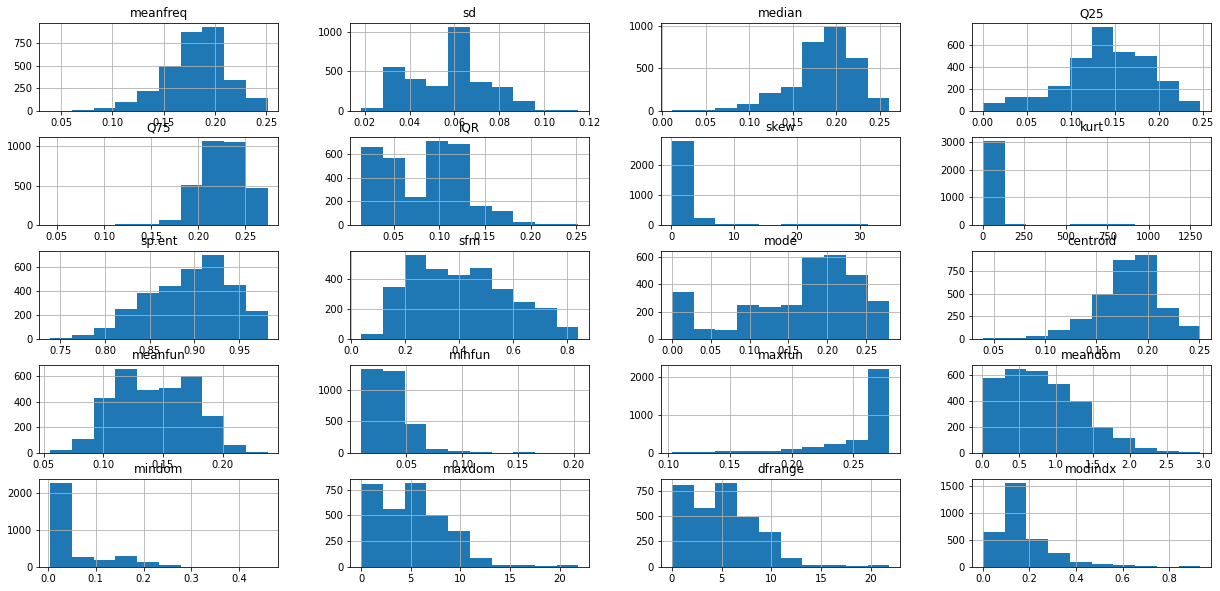

In [ ]:
df.hist(figsize=(21, 10))
plt.show()

+ **The bar charts above to show if there is any outliers; and by looking at it we can se that the data does not contain alot of outliers and the highest features that contains outliers is the skewness and kurt; also we can find that The Data is not biased as it is split evenly between the class (50% males, 50% females).**

### Let's check if we have outliers in our data, by calculating an 1.5 IQR range

In [ ]:
# creating functions:
def check_outliers(col):
    q1,q3=df[col].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [ ]:
# Univariate analysis - since all features are numeric, we use histogram and box plot
def plot(col):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=col,ax=axes[0])
    sns.distplot(a=df[col],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    lower,upper = check_outliers(col)
    l=[df[col] for i in df[col] if i>lower and i<upper] 
    print("Number of data points remaining, if outliers are removed : ",len(l))
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

Number of data points remaining, if outliers are removed :  3059


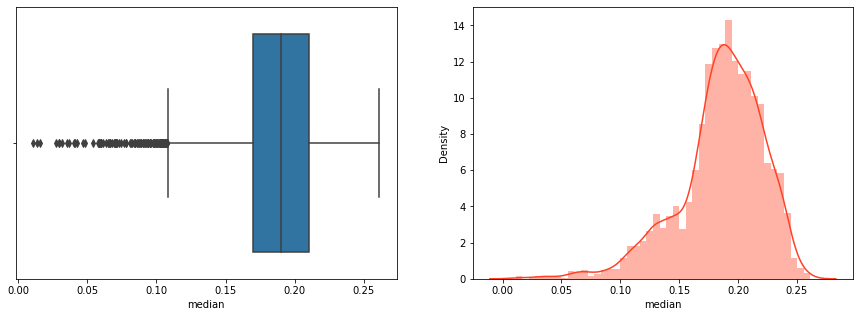

In [ ]:
plot('median')

Number of data points remaining, if outliers are removed :  3104


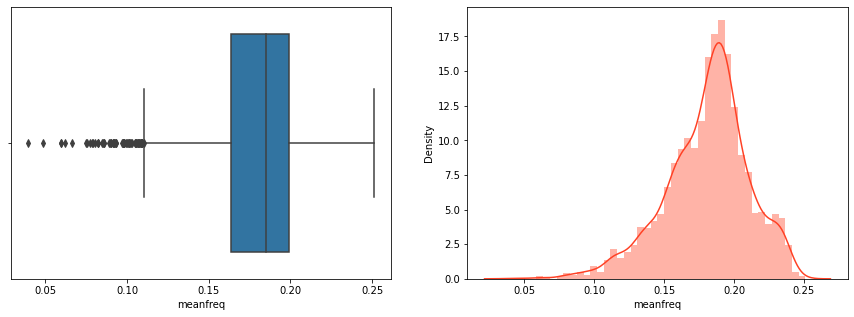

In [ ]:
plot('meanfreq')

1. from box plot: we have some outliers according to 1.5 IQR rule
2. from distplot: the distribution is not perfect;y normal, we have very little -ve skewness >> we can normalize that.
3. more outliers are on the left of the distribution.

# Conclusion:
+ **SVM is cool when there are no large datasets, it runs cool in general, but we need carefully divide dataset to train, test and validation sets.**
+ **From this SVM model, we got Accuracy Scores like that:**

+ **From predicting Train set, got 98,7.**
+ **From predicting Test set, got 97,2.**
+ **From predicting Validation set, got 98.**

+ **Finally, we want to say that the Accuracy score is about 98 %, which means that SVM Classifier Model fits  Perfect.**

+ **We had interesting experince with Whole data Preprocessing, Encoding,Visualisation of plots and analysing metrics and results of SVM model.**